<center><h1>Predictive Modeling - Selected Features Models</h1></center>
This Jupyter Notebook contains the 3 regression models using selected features of the prepared dataset (seoul_bike_data_prepared.csv). Namely, linear regression, regression tree, and k-nearest neighbours. Since select features of the dataset will be used in the regression analyses, I have therefore named these as selected features models. 10-fold cross validation will be used.

The intent is to compare these selected features models with the baseline models in terms of model performance. Selected features models in this case means regression models that I will build with only attributes that are deemed statistically significant.

#### Prepared Dataset

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as pyplot


In [2]:
# Read in the dataset
seoul_bike = pd.read_csv("seoul_bike_data_prepared.csv", encoding="utf-8")
seoul_bike.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,12,2017,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,12,2017,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,12,2017,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,12,2017,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,12,2017,0,0,0,1


#### 1. Linear Regression Model

In [3]:
# Assign the target variable, independent variables, and desired performance metrics
target_name = "Rented Bike Count"
target_variable = seoul_bike[target_name]
independent_variables = seoul_bike.drop(columns=target_name)
performance_metrics = ["r2", "neg_root_mean_squared_error", "neg_mean_absolute_error"]

##### Feature Selection
Sequential Forward Selection (SFS) will be conducted by using the mlxtend module's SequentialFeatureSelector. SFS is a sequential feature selection algorithm which automatically selects a subset of features that are the most important for the regression model. In particular, SFS adds one feature at a time based on the R squared performance metric. This reduces the model's error by discarding insignificant features and as a result, improves the performance metrics.

In [4]:
# mlxtend modules feature selection tool: Sequential Feature Selector
lr_sfs = SFS(estimator=LinearRegression(),
             k_features=(1,18),
             forward=True,
             floating=False,
             scoring="r2",
             cv=10)

# Perform the feature selection
lr_sfs.fit(independent_variables, target_variable)

SequentialFeatureSelector(cv=10, estimator=LinearRegression(),
                          k_features=(1, 18), scoring='r2')

In [5]:
# To visualize the Sequential Feature Selector tool results
lr_sfs_results = pd.DataFrame.from_dict(lr_sfs.get_metric_dict()).T
lr_sfs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[-0.3368353988674757, -0.918271532762825, 0.19...",-0.097393,"(Temperature(°C),)",0.242919,0.32707,0.109023
2,"(1, 4)","[-0.017461238538012402, -0.23849300655795957, ...",0.025709,"(Temperature(°C), Visibility (10m))",0.141344,0.190308,0.063436
3,"(1, 4, 7)","[0.010939557944065204, -0.2462070899370501, 0....",0.040204,"(Temperature(°C), Visibility (10m), Rainfall(mm))",0.152056,0.204731,0.068244
4,"(1, 4, 7, 17)","[-0.014180339709577883, -0.08067897017882486, ...",0.053138,"(Temperature(°C), Visibility (10m), Rainfall(m...",0.132518,0.178424,0.059475
5,"(1, 4, 7, 10, 17)","[-0.03862803818220639, -0.06337005489155612, 0...",0.087882,"(Temperature(°C), Visibility (10m), Rainfall(m...",0.174499,0.234947,0.078316
6,"(1, 4, 7, 10, 14, 17)","[-0.0011678909621402056, -0.14506010569897887,...",0.108275,"(Temperature(°C), Visibility (10m), Rainfall(m...",0.178259,0.24001,0.080003
7,"(1, 4, 7, 9, 10, 14, 17)","[0.038193597168479365, -0.1261734721658878, 0....",0.116176,"(Temperature(°C), Visibility (10m), Rainfall(m...",0.18264,0.24591,0.08197
8,"(1, 4, 6, 7, 9, 10, 14, 17)","[0.0004548344983327235, -0.13342980581946895, ...",0.115867,"(Temperature(°C), Visibility (10m), Solar Radi...",0.18398,0.247713,0.082571
9,"(1, 4, 6, 7, 8, 9, 10, 14, 17)","[-0.005743059846415877, -0.13461998812823261, ...",0.114459,"(Temperature(°C), Visibility (10m), Solar Radi...",0.18395,0.247673,0.082558
10,"(1, 4, 6, 7, 8, 9, 10, 11, 14, 17)","[-0.025528276671164196, -0.12605749383568243, ...",0.112318,"(Temperature(°C), Visibility (10m), Solar Radi...",0.183854,0.247544,0.082515


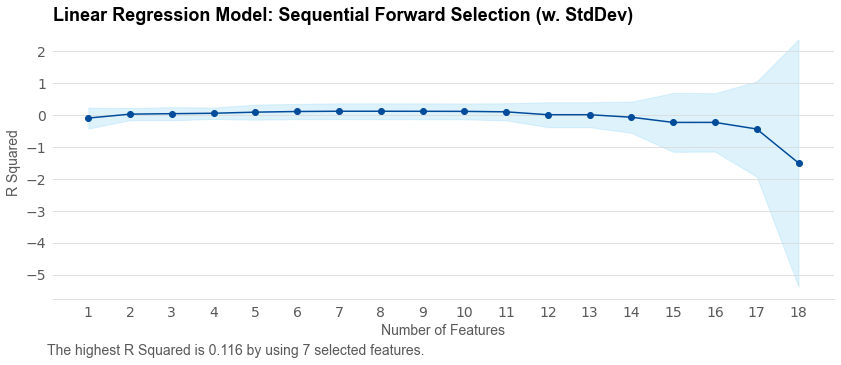

In [29]:
# Global pyplot parameter
pyplot.rcParams["axes.edgecolor"] = "#D9D9D9"

# Plotting the Results
plot_lr_sfs_results = plot_sfs(lr_sfs.get_metric_dict(), kind="std_dev", color="#004C9B", bcolor="#5bc2f4", figsize=[14, 5])

# Add title
pyplot.title(
    "Linear Regression Model: Sequential Forward Selection (w. StdDev)",
    font="Arial",
    fontsize="18",
    fontweight="bold",
    loc="left"
)

# X-axis
pyplot.xlabel(
    "Number of Features", color="#595959", font="Arial", fontsize="14", horizontalalignment="center"
)

# Y-axis
pyplot.ylabel(
    "R Squared",
    color="#595959",
    font="Arial",
    fontsize="14",
    horizontalalignment="center"
)

# Ticks
pyplot.tick_params(colors="#595959", bottom=False, left=False, labelsize="14")

# Add horizontal gridlines
pyplot.grid(axis="y", color="#D9D9D9")

# Spines
sns.despine(left=True)

# Add a caption
pyplot.text(
    0,
    -7.5,
    f"The highest R Squared is {np.round(lr_sfs.k_score_,3)} by using {len(lr_sfs.k_feature_idx_)} selected features.",
    color="#595959",
    font="Arial",
    fontsize="14"
)

pyplot.show()

In [7]:
# Subset the dataframe to get the record with the best R Squared results
lr_sfs_results_sorted = lr_sfs_results.sort_values("avg_score", ascending=False)
highest_lr_r2 = lr_sfs_results_sorted.head(1)
highest_lr_r2

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(1, 4, 7, 9, 10, 14, 17)","[0.038193597168479365, -0.1261734721658878, 0....",0.116176,"(Temperature(°C), Visibility (10m), Rainfall(m...",0.18264,0.24591,0.08197


In [8]:
# The records of the selected features
lr_selected_features = independent_variables[list(highest_lr_r2["feature_names"].values[0])]
lr_selected_features.head()

,Temperature(°C),Visibility (10m),Rainfall(mm),Holiday,Functioning Day,Autumn,Winter
0,-5.2,2000,0.0,0,1,0,1
1,-5.5,2000,0.0,0,1,0,1
2,-6.0,2000,0.0,0,1,0,1
3,-6.2,2000,0.0,0,1,0,1
4,-6.0,2000,0.0,0,1,0,1


In [9]:
# Build the linear regression model and use cross validation
lr_model = LinearRegression()
lr_scores = cross_validate(
    estimator=lr_model,
    X=lr_selected_features,
    y=target_variable,
    cv=10,
    scoring=performance_metrics
)
lr_scores

{'fit_time': array([0.00453258, 0.00300002, 0.00252867, 0.00199986, 0.00253892,
        0.00251341, 0.00200129, 0.00302982, 0.00200129, 0.001508  ]),
 'score_time': array([0.00150323, 0.00099874, 0.00150776, 0.00099993, 0.00404382,
        0.00099945, 0.0010078 , 0.001508  , 0.00149894, 0.00152254]),
 'test_r2': array([ 0.0381936 , -0.12617347,  0.29447898,  0.35963657,  0.19260796,
         0.04516704, -0.45533749,  0.12238027,  0.40105209,  0.28975816]),
 'test_neg_root_mean_squared_error': array([-153.41739785, -126.27949886, -257.85758852, -417.492927  ,
        -656.1514295 , -766.6530513 , -698.56256408, -644.49422079,
        -545.86384631, -413.52229945]),
 'test_neg_mean_absolute_error': array([-107.3295154 ,  -97.28586879, -201.16345441, -321.02988833,
        -511.21040635, -577.54951072, -619.2063464 , -554.64286717,
        -435.2508013 , -308.99506717])}

In [10]:
# Array of performance metrics scores
# Note: abs() is applied to scores returned by sklearn that are the negative value of the metric
lr_r2_scores = lr_scores["test_r2"]
lr_root_mean_squared_error_scores = abs(lr_scores["test_neg_root_mean_squared_error"])
lr_mean_absolute_error_scores = abs(lr_scores["test_neg_mean_absolute_error"])


In [69]:
# Dataframe capturing the overall performance metrics of the linear regression model
lr_metrics = pd.DataFrame(
    {
        "Model": ["Linear Regression"],
        "R Squared": lr_r2_scores.mean(),
        "Root Mean Squared Error": lr_root_mean_squared_error_scores.mean(),
        "Mean Absolute Error": lr_mean_absolute_error_scores.mean(),
        "Number of Features": len(lr_sfs.k_feature_idx_),
        "Feature Indices": [lr_sfs.k_feature_idx_],
        "Feature Names": [lr_sfs.k_feature_names_]
    }
)
lr_metrics


,Model,R Squared,Root Mean Squared Error,Mean Absolute Error,Number of Features,Feature Indices,Feature Names
0,Linear Regression,0.116176,468.029482,373.366373,7,"(1, 4, 7, 9, 10, 14, 17)","(Temperature(°C), Visibility (10m), Rainfall(m..."


#### 2. Regression Tree Model

##### Feature Selection
Sequential Forward Selection (SFS) will be conducted by using the mlxtend module's SequentialFeatureSelector. SFS is a sequential feature selection algorithm which automatically selects a subset of features that are the most important for the regression model. In particular, SFS adds one feature at a time based on the R squared performance metric. This reduces the model's error by discarding insignificant features and as a result, improves the performance metrics.

In [12]:
# mlxtend modules feature selection tool: Sequential Feature Selector
rt_sfs = SFS(estimator=DecisionTreeRegressor(random_state=3),
             k_features=(1,18),
             forward=True,
             floating=False,
             scoring="r2",
             cv=10)

# Perform the feature selection
rt_sfs.fit(independent_variables, target_variable)

SequentialFeatureSelector(cv=10,
                          estimator=DecisionTreeRegressor(random_state=3),
                          k_features=(1, 18), scoring='r2')

In [13]:
# To visualize the Sequential Feature Selector tool results
rt_sfs_results = pd.DataFrame.from_dict(rt_sfs.get_metric_dict()).T
rt_sfs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(17,)","[-0.06178284381364185, -0.25318375175919794, -...",-0.206011,"(Winter,)",0.204342,0.275129,0.09171
2,"(0, 17)","[0.3986806973882365, 0.19908658027429715, -0.7...",0.216475,"(Hour, Winter)",0.259982,0.350043,0.116681
3,"(0, 16, 17)","[0.3986806973882365, 0.19908658027429715, -0.2...",0.299796,"(Hour, Summer, Winter)",0.158896,0.213941,0.071314
4,"(0, 7, 16, 17)","[0.4149292463114904, 0.1737705108060431, -0.45...",0.343045,"(Hour, Rainfall(mm), Summer, Winter)",0.215707,0.290431,0.09681
5,"(0, 7, 10, 16, 17)","[0.4149292463114904, 0.1737705108060431, -0.87...",0.374553,"(Hour, Rainfall(mm), Functioning Day, Summer, ...",0.326822,0.440038,0.146679
6,"(0, 7, 10, 13, 16, 17)","[0.4149292463114904, 0.11311814771476014, -0.8...",0.367048,"(Hour, Rainfall(mm), Functioning Day, Year, Su...",0.33196,0.446957,0.148986
7,"(0, 7, 8, 10, 13, 16, 17)","[0.4075799273024534, -0.013257495179018086, -0...",0.349629,"(Hour, Rainfall(mm), Snowfall (cm), Functionin...",0.348485,0.469205,0.156402
8,"(0, 7, 8, 9, 10, 13, 16, 17)","[0.45535361183009726, -0.3821754258535781, -0....",0.312782,"(Hour, Rainfall(mm), Snowfall (cm), Holiday, F...",0.381782,0.514037,0.171346
9,"(0, 1, 7, 8, 9, 10, 13, 16, 17)","[0.11386365245038643, -0.21352497256649006, -0...",0.301336,"(Hour, Temperature(°C), Rainfall(mm), Snowfall...",0.246263,0.331573,0.110524
10,"(0, 1, 2, 7, 8, 9, 10, 13, 16, 17)","[0.1757459296888947, -0.1166019136110068, -0.1...",0.39384,"(Hour, Temperature(°C), Humidity(%), Rainfall(...",0.224895,0.302801,0.100934


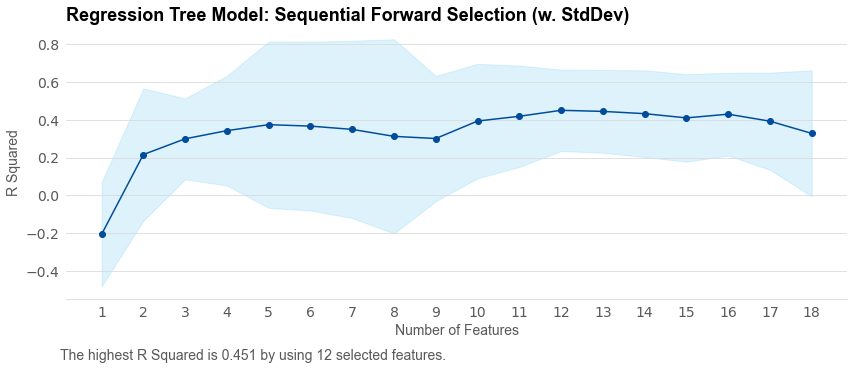

In [40]:
# Global pyplot parameter
pyplot.rcParams["axes.edgecolor"] = "#D9D9D9"

# Plotting the Results
plot_rt_sfs_results = plot_sfs(rt_sfs.get_metric_dict(), kind="std_dev", color="#004C9B", bcolor="#5bc2f4", figsize=[14, 5])

# Add title
pyplot.title(
    "Regression Tree Model: Sequential Forward Selection (w. StdDev)",
    font="Arial",
    fontsize="18",
    fontweight="bold",
    loc="left"
)

# X-axis
pyplot.xlabel(
    "Number of Features", color="#595959", font="Arial", fontsize="14", horizontalalignment="center"
)

# Y-axis
pyplot.ylabel(
    "R Squared",
    color="#595959",
    font="Arial",
    fontsize="14",
    horizontalalignment="center"
)

# Ticks
pyplot.tick_params(colors="#595959", bottom=False, left=False, labelsize="14")

# Add horizontal gridlines
pyplot.grid(axis="y", color="#D9D9D9")

# Spines
sns.despine(left=True)

# Add a caption
pyplot.text(
    0,
    -0.87,
    f"The highest R Squared is {np.round(rt_sfs.k_score_,3)} by using {len(rt_sfs.k_feature_idx_)} selected features.",
    color="#595959",
    font="Arial",
    fontsize="14"
)

pyplot.show()

In [14]:
# Subset the dataframe to get the record with the best R Squared results
rt_sfs_results_sorted = rt_sfs_results.sort_values("avg_score", ascending=False)
highest_rt_r2 = rt_sfs_results_sorted.head(1)
highest_rt_r2

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 1, 2, 6, 7, 8, 9, 10, 13, 14, 16, 17)","[0.19067333453364177, 0.01956974753667373, 0.3...",0.450626,"(Hour, Temperature(°C), Humidity(%), Solar Rad...",0.160101,0.215562,0.071854


In [15]:
# The records of the selected features
rt_selected_features = independent_variables[list(highest_rt_r2["feature_names"].values[0])]
rt_selected_features.head()

,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Autumn,Summer,Winter
0,0,-5.2,37,0.0,0.0,0.0,0,1,2017,0,0,1
1,1,-5.5,38,0.0,0.0,0.0,0,1,2017,0,0,1
2,2,-6.0,39,0.0,0.0,0.0,0,1,2017,0,0,1
3,3,-6.2,40,0.0,0.0,0.0,0,1,2017,0,0,1
4,4,-6.0,36,0.0,0.0,0.0,0,1,2017,0,0,1


In [16]:
# Build the regression tree model and use cross validation
# random_state is set to 3 for reproducibility
rt_model = DecisionTreeRegressor(random_state=3)
rt_scores = cross_validate(
    estimator=rt_model,
    X=rt_selected_features,
    y=target_variable,
    cv=10,
    scoring=performance_metrics
)
rt_scores

{'fit_time': array([0.02261305, 0.02108574, 0.02150464, 0.02118039, 0.02501607,
        0.01952267, 0.02003741, 0.02053094, 0.02002835, 0.02059603]),
 'score_time': array([0.00149989, 0.00150275, 0.00100374, 0.00150132, 0.00149989,
        0.00252652, 0.00150156, 0.00100136, 0.0015018 , 0.00100732]),
 'test_r2': array([0.19067333, 0.01956975, 0.36915237, 0.3618115 , 0.64874401,
        0.69024584, 0.53063535, 0.57789491, 0.72323866, 0.39429686]),
 'test_neg_root_mean_squared_error': array([-140.73194994, -117.82530021, -243.83002257, -416.78333755,
        -432.78650869, -436.66033057, -396.71501422, -446.96769315,
        -371.0586084 , -381.87895085]),
 'test_neg_mean_absolute_error': array([ -97.57534247,  -78.53424658, -157.88584475, -281.46004566,
        -295.06164384, -299.46118721, -239.42808219, -294.96347032,
        -230.15525114, -253.41210046])}

In [17]:
# Array of performance metrics scores
# Note: abs() is applied to scores returned by sklearn that are the negative value of the metric
rt_r2_scores = rt_scores["test_r2"]
rt_root_mean_squared_error_scores = abs(rt_scores["test_neg_root_mean_squared_error"])
rt_mean_absolute_error_scores = abs(rt_scores["test_neg_mean_absolute_error"])

In [70]:
# Dataframe capturing the overall performance metrics of the regression tree model
rt_metrics = pd.DataFrame(
    {
        "Model": ["Regression Tree"],
        "R Squared": rt_r2_scores.mean(),
        "Root Mean Squared Error": rt_root_mean_squared_error_scores.mean(),
        "Mean Absolute Error": rt_mean_absolute_error_scores.mean(),
        "Number of Features": len(rt_sfs.k_feature_idx_),
        "Feature Indices": [rt_sfs.k_feature_idx_],
        "Feature Names": [rt_sfs.k_feature_names_]
    }
)
rt_metrics


,Model,R Squared,Root Mean Squared Error,Mean Absolute Error,Number of Features,Feature Indices,Feature Names
0,Regression Tree,0.450626,338.523772,222.793721,12,"(0, 1, 2, 6, 7, 8, 9, 10, 13, 14, 16, 17)","(Hour, Temperature(°C), Humidity(%), Solar Rad..."


#### 3. K-Nearest Neighbours Model

##### Feature Selection
Sequential Forward Selection (SFS) will be conducted by using the mlxtend module's SequentialFeatureSelector. SFS is a sequential feature selection algorithm which automatically selects a subset of features that are the most important for the regression model. In particular, SFS adds one feature at a time based on the R squared performance metric. This reduces the model's error by discarding insignificant features and as a result, improves the performance metrics.

In [42]:
# Build the k-nearest neighbours model and use cross validation
# I will use a range of k values (1 to 20) to determine which k contributes to the best performing model

# Create empty lists to append each metric
knn_k = []
knn_r2 = []
knn_root_mean_squared_error = []
knn_mean_absolute_error = []
knn_number_of_features = []
knn_feature_indices = []
knn_feature_names = []

for k in range(1, 21):
    
    knn = KNeighborsRegressor(n_neighbors = k)
    
    # mlxtend modules feature selection tool: Sequential Feature Selector
    knn_sfs = SFS(estimator=knn,
                k_features=(1,18),
                forward=True,
                floating=False,
                scoring="r2",
                cv=10)

    # Perform the feature selection
    knn_sfs.fit(independent_variables, target_variable)
    
    # Sequential Feature Selector tool results
    knn_sfs_results = pd.DataFrame.from_dict(knn_sfs.get_metric_dict()).T
    
    # Subset the dataframe to get the record with the best R Squared results for the current k value
    knn_sfs_results_sorted = knn_sfs_results.sort_values("avg_score", ascending=False)
    highest_knn_r2 = knn_sfs_results_sorted.head(1)
    
    # Capture the records of the selected features
    knn_selected_features = independent_variables[list(highest_knn_r2["feature_names"].values[0])]
    
    knn_model = knn
    knn_scores = cross_validate(
        estimator=knn_model,
        X=knn_selected_features,
        y=target_variable,
        cv=10,
        scoring=performance_metrics
    )
    
    # Array of performance metrics scores
    # Note: abs() is applied to scores returned by sklearn that are the negative value of the metric
    knn_r2_scores = knn_scores["test_r2"]
    knn_root_mean_squared_error_scores = abs(knn_scores["test_neg_root_mean_squared_error"])
    knn_mean_absolute_error_scores = abs(knn_scores["test_neg_mean_absolute_error"])
    knn_k_number_of_features = len(knn_sfs.k_feature_idx_)
    knn_k_feature_indices = knn_sfs.k_feature_idx_
    knn_k_feature_names = knn_sfs.k_feature_names_
    
    # Average the scores from each fold of the cross validation
    # Append the metrics to lists
    knn_k.append(k)
    knn_r2.append(knn_r2_scores.mean())
    knn_root_mean_squared_error.append(knn_root_mean_squared_error_scores.mean())
    knn_mean_absolute_error.append(knn_mean_absolute_error_scores.mean())
    knn_number_of_features.append(knn_k_number_of_features)
    knn_feature_indices.append(knn_k_feature_indices)
    knn_feature_names.append(knn_k_feature_names)

In [43]:
# Dataframe capturing the overall performance metrics of the k-nearest neighbours model
knn_metrics = pd.DataFrame(
    {
        "Model": "K-Nearest Neighbours",
        "k": knn_k,
        "R Squared": knn_r2,
        "Root Mean Squared Error": knn_root_mean_squared_error,
        "Mean Absolute Error": knn_mean_absolute_error,
        "Number of Features": knn_number_of_features,
        "Feature Indices": knn_feature_indices,
        "Feature Names": knn_feature_names
    }
)
knn_metrics


,Model,k,R Squared,Root Mean Squared Error,Mean Absolute Error,Number of Features,Feature Indices,Feature Names
0,K-Nearest Neighbours,1,0.219436,421.667416,275.031507,11,"(0, 1, 6, 7, 8, 9, 10, 13, 14, 16, 17)","(Hour, Temperature(°C), Solar Radiation (MJ/m2..."
1,K-Nearest Neighbours,2,0.327433,378.059800,258.132192,10,"(0, 1, 5, 6, 7, 8, 10, 13, 14, 17)","(Hour, Temperature(°C), Dew point temperature(..."
2,K-Nearest Neighbours,3,0.381221,364.634444,250.500495,8,"(0, 1, 5, 7, 10, 14, 16, 17)","(Hour, Temperature(°C), Dew point temperature(..."
3,K-Nearest Neighbours,4,0.401190,358.527755,247.725828,7,"(0, 1, 5, 7, 10, 14, 17)","(Hour, Temperature(°C), Dew point temperature(..."
4,K-Nearest Neighbours,5,0.413967,354.322939,245.218904,9,"(0, 1, 5, 7, 8, 10, 14, 16, 17)","(Hour, Temperature(°C), Dew point temperature(..."
5,K-Nearest Neighbours,6,0.426136,351.644301,243.903063,10,"(0, 1, 5, 6, 7, 8, 10, 14, 16, 17)","(Hour, Temperature(°C), Dew point temperature(..."
6,K-Nearest Neighbours,7,0.430954,349.242086,243.780528,9,"(0, 1, 5, 7, 8, 10, 14, 16, 17)","(Hour, Temperature(°C), Dew point temperature(..."
7,K-Nearest Neighbours,8,0.430172,349.301746,243.914740,8,"(0, 1, 5, 7, 10, 14, 16, 17)","(Hour, Temperature(°C), Dew point temperature(..."
8,K-Nearest Neighbours,9,0.428678,349.272094,244.077220,8,"(0, 1, 5, 7, 10, 14, 16, 17)","(Hour, Temperature(°C), Dew point temperature(..."
9,K-Nearest Neighbours,10,0.429712,348.841335,244.519863,8,"(0, 1, 5, 7, 10, 14, 16, 17)","(Hour, Temperature(°C), Dew point temperature(..."


<AxesSubplot: title={'left': 'k-Nearest Neighbours: Optimal k Value'}, xlabel='k', ylabel='R Squared'>

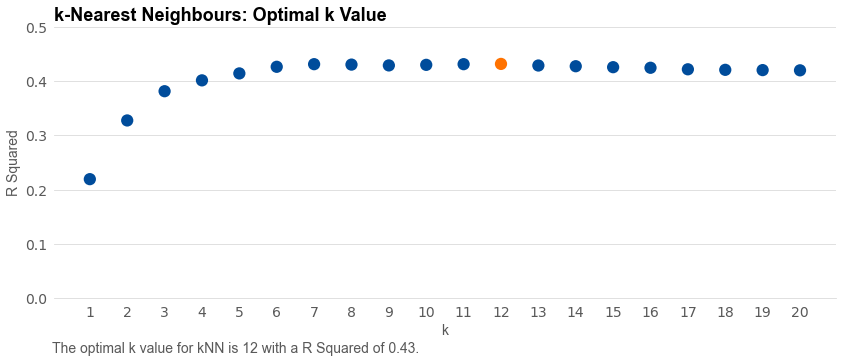

In [60]:
# Plot the k values by R squared to visualize the performance of each k-nearest neighbours model
value_r2 = knn_metrics["R Squared"] == knn_metrics["R Squared"].max()
knn_metrics["colour_r2"] = np.where(value_r2 == True, "#FF7200", "#004C9B")
knn_plt = sns.regplot(
    data=knn_metrics,
    x="k",
    y="R Squared",
    fit_reg=False,
    scatter_kws={
        "alpha": 1,
        "facecolors": knn_metrics["colour_r2"],
        "linewidths": 0,
        "s": 150,
        "zorder": 10,
    }
)

# Add title
knn_plt.set_title(
    "k-Nearest Neighbours: Optimal k Value",
    font="Arial",
    fontsize="18",
    fontweight="bold",
    loc="left"
)

# X-axis
plt.xlabel(
    "k", color="#595959", font="Arial", fontsize="14", horizontalalignment="center"
)

# Y-axis
plt.ylabel(
    "R Squared",
    color="#595959",
    font="Arial",
    fontsize="14",
    horizontalalignment="center"
)

# Ticks
plt.xticks(range(int(knn_metrics["k"].min()), int(knn_metrics["k"].max()) + 1, 1))
plt.tick_params(colors="#595959", bottom=False, left=False, labelsize="14")

# Add horizontal gridlines
plt.grid(axis="y", color="#D9D9D9")

# Set plot size
knn_plt.figure.set_size_inches(14, 5)

# Spines
sns.despine(left=True)
for _, s in knn_plt.spines.items():
    s.set_color("#D9D9D9")

# Get the current Axes object
ax = plt.gca()

# Set the ylim to begin at 0
ax.set_ylim(top=0.5, bottom=0)

# Get row with max R squared
max_y_row = knn_metrics.loc[knn_metrics["R Squared"].idxmax()]

# Get the max R squared value and the corresponding x value
max_y_value = np.round(max_y_row["R Squared"], 2)
corresponding_x_value = np.round(max_y_row["k"], 2)

# Add a caption
plt.text(
    0,
    -0.1,
    f"The optimal k value for kNN is {corresponding_x_value} with a R Squared of {max_y_value}.",
    color="#595959",
    font="Arial",
    fontsize="14"
)

knn_plt


In [61]:
# For the k-nearest neighbours models, I will choose the one with the highest R squared value
knn_metrics_sorted = knn_metrics.sort_values("R Squared", ascending=False)
knn_metrics_sorted.drop(columns=["k", "colour_r2"], inplace=True)

# Subset the dataframe to keep the record with the highest R Squared
highest_knn_metrics = knn_metrics_sorted.head(1)
highest_knn_metrics

,Model,R Squared,Root Mean Squared Error,Mean Absolute Error,Number of Features,Feature Indices,Feature Names
11,K-Nearest Neighbours,0.43143,348.876643,244.921299,8,"(0, 1, 5, 7, 10, 14, 16, 17)","(Hour, Temperature(°C), Dew point temperature(..."


#### Performance Metrics
The performance metrics of all regression models are displayed below as a pandas dataframe and Tableau visualizations.

In [71]:
# Create a selected_features_metrics dataframe to capture the performance metrics of all regression models built with selected features
selected_features_metrics = pd.concat([lr_metrics, rt_metrics, highest_knn_metrics])
selected_features_metrics.reset_index(drop=True, inplace=True)
selected_features_metrics

,Model,R Squared,Root Mean Squared Error,Mean Absolute Error,Number of Features,Feature Indices,Feature Names
0,Linear Regression,0.116176,468.029482,373.366373,7,"(1, 4, 7, 9, 10, 14, 17)","(Temperature(°C), Visibility (10m), Rainfall(m..."
1,Regression Tree,0.450626,338.523772,222.793721,12,"(0, 1, 2, 6, 7, 8, 9, 10, 13, 14, 16, 17)","(Hour, Temperature(°C), Humidity(%), Solar Rad..."
2,K-Nearest Neighbours,0.431430,348.876643,244.921299,8,"(0, 1, 5, 7, 10, 14, 16, 17)","(Hour, Temperature(°C), Dew point temperature(..."


In [74]:
# Export the selected_features_metrics dataframe to a .csv flat file
selected_features_metrics.to_csv("selected_features_metrics.csv", index=False, encoding="utf-8-sig")

![Selected Features Metrics Tableau Visualization](selected_features_metrics_tableau.PNG "Selected Features Metrics")

Based on the performance metrics of each model, the regression tree model is the best performing, followed by k-nearest neighbours in second place, and linear regression being last. Notably, the R Squared for regression tree and k-nearest neighbours are quite close in value whereas the linear regression model currently has suboptimal performance. As per the sklearn module, the best score for the R squared is 1.0. This means that the performance of the regression tree and k-nearest neighbours is approaching the halfway mark. In terms of the error metrics, root mean squared error and mean absolute error, the lower the error values the better performing the models are.

![Baseline Metrics Tableau Visualization](baseline_metrics_tableau.PNG "Baseline Metrics")

By comparing the 2 graphs, "Selected Features Models - Performance Metrics" and "Baseline Models - Performance Metrics", we can see that using selected features in our models has improved the R squared of regression tree by approximately 0.12. In particular, for both k-nearest neighbours and linear regression, using selected features in our models has significantly improved the R squared from negative arbitrary values (very poor performance) to tangible R squared values of 0.43 and 0.12 respectively.

Therefore, by comparing the performance of the selected features models (as seen in the graph "Selected Features Models - Performance Metrics") and the baseline models (as seen in the graph "Baseline Models - Performance Metrics"), it can be concluded that using a feature selection method, namely Sequential Forward Selection from the mlxtend module has optimized the performance of all regression models.